When you are dealing with data which are presented to you in different groups or sub-populations, you might be interested in knowing whether they arise from the same population, or they represent different populations (with different parameters).

The answer to this problem is what the (One-way) ANalysis Of VAriance is meant for. It basically decomposes the variances within each group and among groups, relying on the Null Hypothesis that groups/samples have been drawn from the same population, hence their means are equivalent

The ANOVA produces an F-statistic : for high values of F (generally higher than 3.68, which corresponds to a significance level of 5%) we can reject with sufficient confidence the Null, concluding that groups are not arising from the same population.

As a case study, imagine a bunch of students from different colleges taking the same exam. You want to see if one college outperforms the other, hence your null hypothesis is that the means of GPAs in each group are equivalent to those of the other groups. To keep it simple, we will consider 3 groups (college ‘A’, ‘B’, ‘C’) with 6 students each.

In [2]:
import numpy as np
import pandas as pd

In [3]:
a=[25,25,27,30,23,20]
b=[30,30,21,24,26,28]
c=[18,30,29,29,24,26]
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


Once made the following necessary assumptions: <br/><br/>
Response variable residuals are normally distributed (or approximately normally distributed)<br/>
Variances of populations are equal<br/>
Responses for a given group are independent and identically distributed normal random variables<br/>
We can start with our steps:

**Step 1: compute the average mark for each college like so:**

<img src="https://miro.medium.com/max/524/0*z6FnC51piW8vVSLY" >

In [4]:
import numpy as np
m1=np.mean(a)
m2=np.mean(b)
m3=np.mean(c)

print('Average mark for college A: {}'.format(m1))
print('Average mark for college B: {}'.format(m2))
print('Average mark for college C: {}'.format(m3))

Average mark for college A: 25.0
Average mark for college B: 26.5
Average mark for college C: 26.0


**Step 2: compute the overall mean (k is the number of groups, hence in our case k=3):**
<img src="https://miro.medium.com/max/660/0*hn4KUNua7Ocxd24U" >

In [5]:
m=(m1+m2+m3)/3 
print('Overall mean: {}'.format(m)) 

Overall mean: 25.833333333333332


**Step 3: compute the ‘between-group’ sum of squared differences ** (where n is the number of observations per group/college, hence in our case n=6): <br/>

<img src="https://miro.medium.com/max/2254/1*fVDds0H1KmHtg1gsRDkygA.png" >

In [8]:
SSb=6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 6.999999999999999


With those results, we can already compute one of the components of our F-score, which is the between-group mean square value (MSb). Indeed, knowing that the between-group degrees of freedom are k-1 (that means, one less than the number of groups), we can compute the MSb as:

<img src="https://miro.medium.com/max/568/0*YLsmiQi9ucOzdVG5" >

Where df are the degrees of freedom.

In [9]:
MSb=SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


**Step 4: calculate the “within-group” sum of squares.**

<img src = "https://miro.medium.com/max/900/0*lKpLGIJcrs9SiVZU" >

In [10]:
err_a=list(a-m1)
err_b=list(b-m2)
err_c=list(c-m3)
err=err_a+err_b+err_c
ssw=[]
for i in err:
    ssw.append(i**2)
    
SSw=np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 223.5


Again, knowing that there are k(n-1) within-group degrees of freedom (hence in our case 15), we can compute the within-group mean square value:<br/>
<img src="https://miro.medium.com/max/518/0*uOUWLdRWAdchIZGa" >

In [11]:
MSw=SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


**Step 5: compute the F-score:**

In [12]:
F=MSb/MSw 
print('F-score: {}'.format(F)) 

F-score: 0.23489932885906037


**Double check using scipy**

In [13]:
import scipy.stats as stats 
stats.f_oneway(a,b,c) 

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

If the assumptions above are true, the ratio MSb/MSw behaves as a Fisher distribution with (2,15) degrees of freedom:

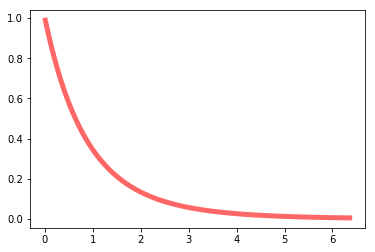

In [15]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')

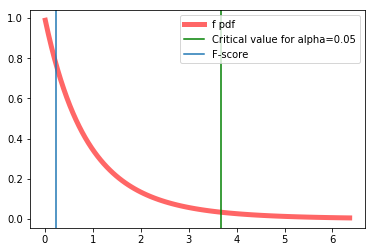

In [19]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(x=stats.f.ppf(0.95,dfn,dfd), label='Critical value for alpha=0.05', color='g')
plt.axvline(x=F, label='F-score')
plt.legend()

We do not reject the Null hypothesis about equality among means. We can conclude (with an error of 5%, or alternatively, with a confidence of 95%) that there is no significant difference between our three colleges A, B and C.

# Example

Three groups of samples of factory emissions of different plants of the same company were collected. The score is computed based on the composition of the emissions. We want to find out if there is any inconsistency or difference across the three groups.
<br/><br/>
A = 57,56,58,58,56,59,56,55,53,54,53,42,44,34,54,54,34,64,84,24<br/>
B = 49,47,49,47,49,47,49,46,45,46,41,42,41,42,42,42,14,14,34<br/>
C = 49,48,46,46,49,46,45,55,61,45,45,45,49,54,44,74,54,84,39


Hypothesis of One-Way ANOVA <br/> <br/>
H0 : µ1 = µ2 = µ3 = µ4 = …= µk <br/><br/>

All population means are equal  <br/><br/>

Ha : Not all of the population means are equal<br/><br/>

For at least one pair, the population means are unequal.

In [20]:
a = np.array([57,56,58,58,56,59,56,55,53,54,53,42,44,34,54,54,34,64,84,24])
b = np.array([49,47,49,47,49,47,49,46,45,46,41,42,41,42,42,42,14,14,34])
c = np.array([49,48,46,46,49,46,45,55,61,45,45,45,49,54,44,74,54,84,39])

In [23]:
import scipy.stats as stats 
F, p = stats.f_oneway(a,b,c) 
print('F : ', F)
print('p : ', p)

F :  5.605295675427708
p :  0.0060879156389451235


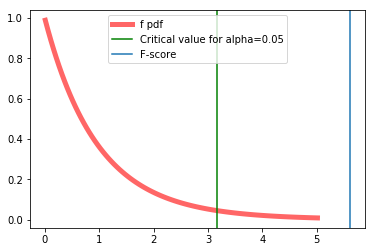

In [24]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,(len(a) + len(b) + len(c) - 3)
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(x=stats.f.ppf(0.95,dfn,dfd), label='Critical value for alpha=0.05', color='g')
plt.axvline(x=F, label='F-score')
plt.legend()

F statistic > F Critical <br/>
Since our f-statistic is beyond the critical value, we reject the null